#Notebook

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Proyecto para predecir la diabetes

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [84]:
#Elimino duplicados
df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [85]:
#Verifico que no haya null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [86]:
df.describe()
#Veo que hay datos con mínimo 0, que no tienen sentido glucosa, presión de sangre, skin thickness, insulina, indice de masa corporal ? wtf
#Estos datos se pueden rellenar con la media ??? :O

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
#EDA

In [88]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
Y = df['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
261,3,141,0,0,0,30.0,0.761,27
697,0,99,0,0,0,25.0,0.253,22
426,0,94,0,0,0,0.0,0.256,25
378,4,156,75,0,0,48.3,0.238,32
211,0,147,85,54,0,42.8,0.375,24


In [89]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

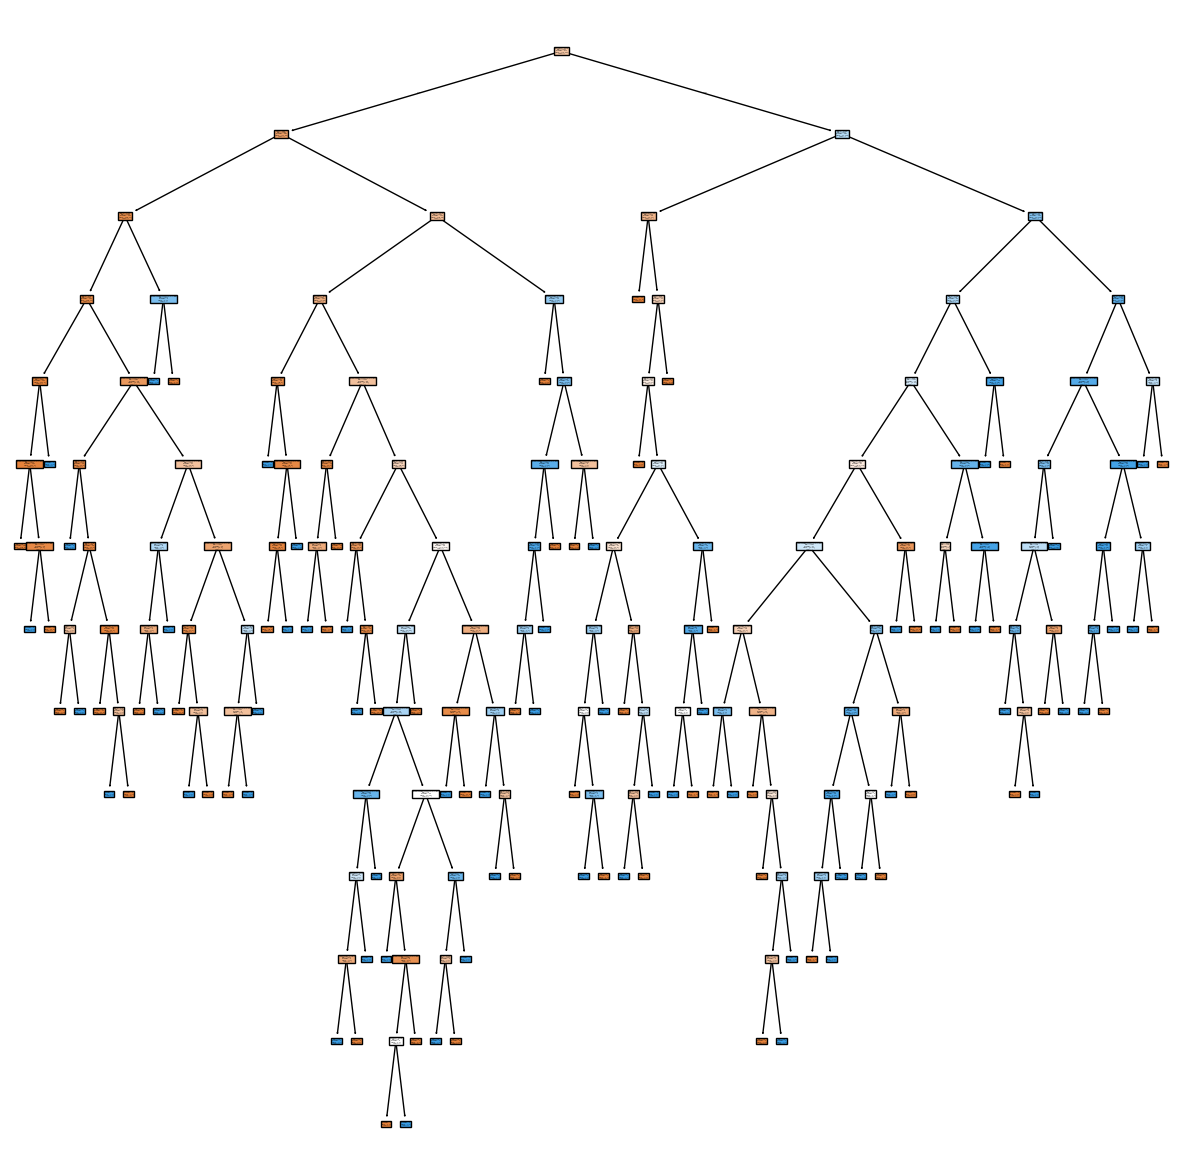

In [90]:
from sklearn import tree

fig = plt.figure(figsize = (15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [91]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [92]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_pred)


0.7395833333333334

In [93]:
#Ahora le voy a dar otra medida/criterio para que tenga en cuenta para mejorar el modelo

model1 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model2 = DecisionTreeClassifier(random_state=42,criterion='log_loss')

model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='log_loss', random_state=42)

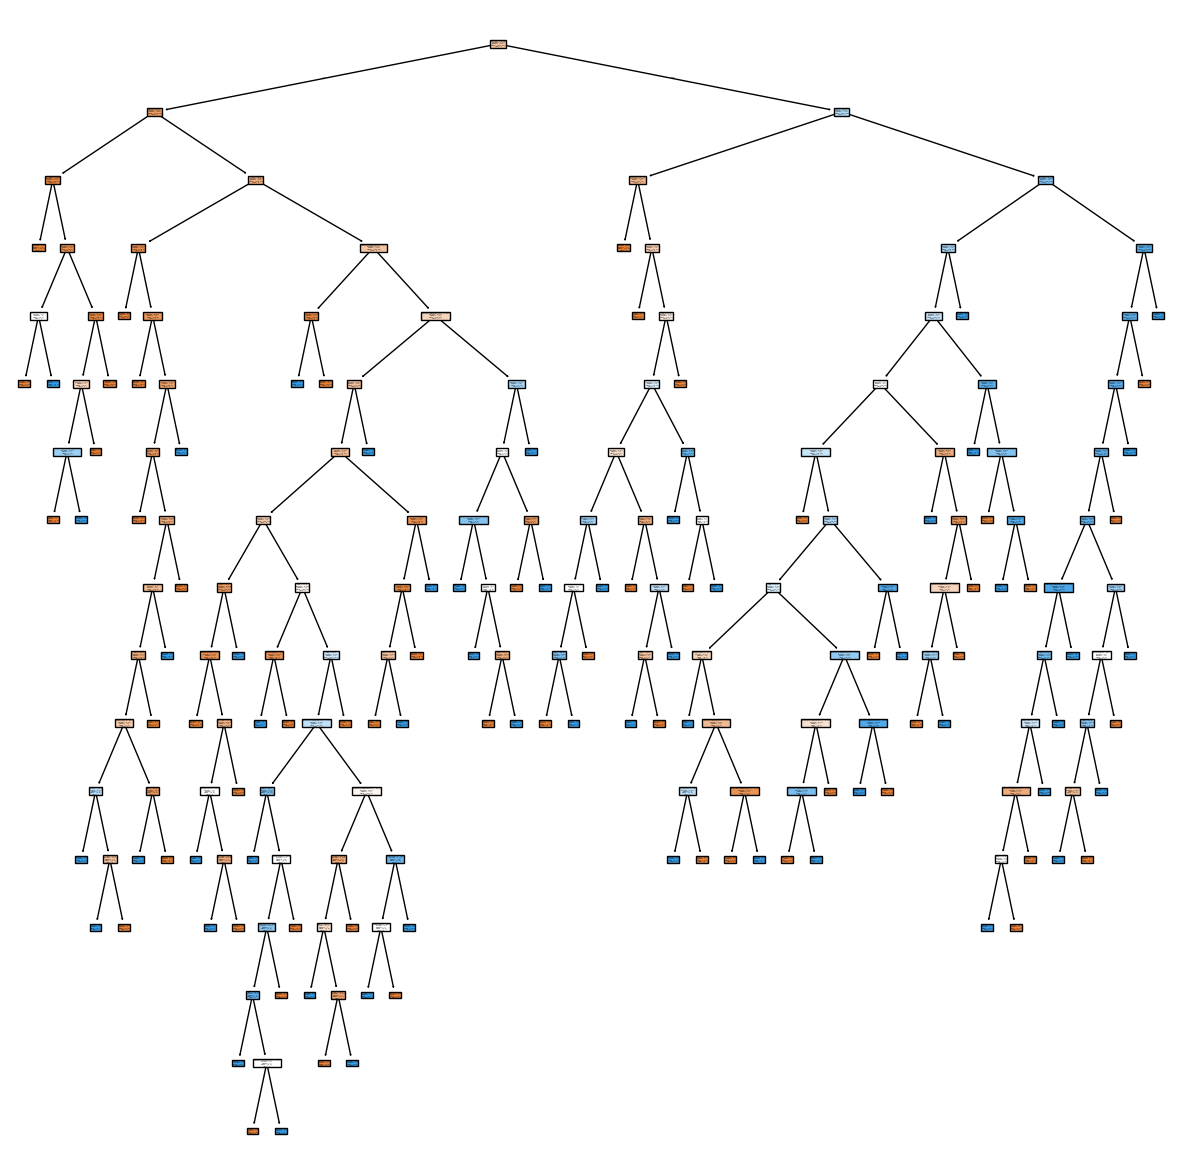

In [94]:
#Voy a revisar si cambian los árboles
fig = plt.figure(figsize = (15,15))

tree.plot_tree(model1, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

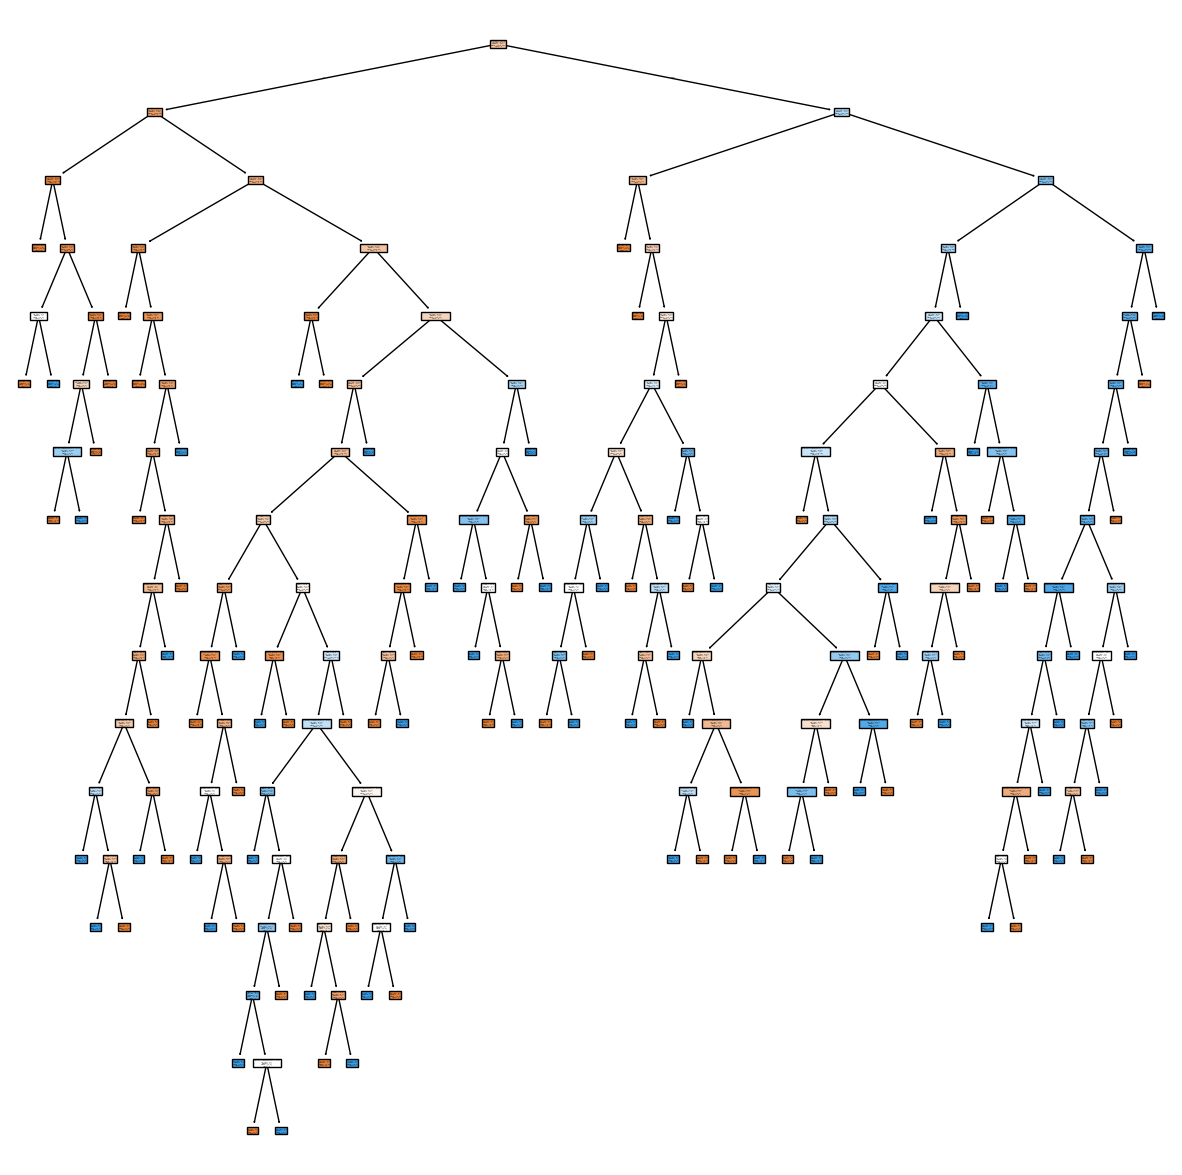

In [95]:
#Voy a revisar si cambian los árboles
fig = plt.figure(figsize = (15,15))

tree.plot_tree(model2, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [96]:
Y_pred_entropy = model1.predict(X_test)
print(accuracy_score(Y_test,Y_pred_entropy))
Y_pred_log_loss = model2.predict(X_test)
print(accuracy_score(Y_test,Y_pred_log_loss))

0.734375
0.734375


In [97]:
#Ahora la grilla para hiperparametrización

DecisionTreeClassifier()
grid = {
    'criterion' : ['gini','log_loss','entropy'],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,4,6,8],
    'max_features' : ['auto','sqrt','log2',2,3,4,5],
}
from sklearn.model_selection import GridSearchCV

Clf = GridSearchCV(model,grid,scoring='accuracy')
Clf.fit(X_train,Y_train)

best_model = Clf.best_estimator_

print(Clf.best_params_)
print(Clf.best_score_)



{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2}
0.7379010494752624


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [98]:
print(model.feature_importances_)
print(X_train.columns)
#Se observa que la variable más relevante, con la
#Que más decisiones toma es la glucosa.

[0.06685999 0.27368619 0.09199536 0.02447444 0.05709712 0.21720852
 0.16507503 0.10360334]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [100]:
from pickle import dump
dump(best_model, open('../models/Decision_Tree_Classifier_42', 'wb'))
